<a href="https://colab.research.google.com/github/wgmasvix-hue/ChengetAI/blob/main/site/en/tutorials/quickstart/beginner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2019 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# TensorFlow 2 quickstart for beginners

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/quickstart/beginner"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This short introduction uses [Keras](https://www.tensorflow.org/guide/keras/overview) to:

1. Load a prebuilt dataset.
1. Build a neural network machine learning model that classifies images.
2. Train this neural network.
3. Evaluate the accuracy of the model.

This tutorial is a [Google Colaboratory](https://colab.research.google.com/notebooks/welcome.ipynb) notebook. Python programs are run directly in the browser—a great way to learn and use TensorFlow. To follow this tutorial, run the notebook in Google Colab by clicking the button at the top of this page.

1. In Colab, connect to a Python runtime: At the top-right of the menu bar, select *CONNECT*.
2. To run all the code in the notebook, select **Runtime** > **Run all**. To run the code cells one at a time, hover over each cell and select the **Run cell** icon.

![Run cell icon](https://github.com/tensorflow/docs/blob/master/site/en/tutorials/quickstart/images/beginner/run_cell_icon.png?raw=1)

## Set up TensorFlow

Import TensorFlow into your program to get started:

In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

If you are following along in your own development environment, rather than [Colab](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb), see the [install guide](https://www.tensorflow.org/install) for setting up TensorFlow for development.

Note: Make sure you have upgraded to the latest `pip` to install the TensorFlow 2 package if you are using your own development environment. See the [install guide](https://www.tensorflow.org/install) for details.

## Load a dataset

Load and prepare the MNIST dataset. The pixel values of the images range from 0 through 255. Scale these values to a range of 0 to 1 by dividing the values by `255.0`. This also converts the sample data from integers to floating-point numbers:

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

## Build a machine learning model

Build a `tf.keras.Sequential` model:

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

[`Sequential`](https://www.tensorflow.org/guide/keras/sequential_model) is useful for stacking layers where each layer has one input [tensor](https://www.tensorflow.org/guide/tensor) and one output tensor. Layers are functions with a known mathematical structure that can be reused and have trainable variables. Most TensorFlow models are composed of layers. This model uses the [`Flatten`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten), [`Dense`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense), and [`Dropout`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) layers.

For each example, the model returns a vector of [logits](https://developers.google.com/machine-learning/glossary#logits) or [log-odds](https://developers.google.com/machine-learning/glossary#log-odds) scores, one for each class.

In [ ]:
predictions = model(x_train[:1]).numpy()
predictions

The `tf.nn.softmax` function converts these logits to *probabilities* for each class:

In [9]:
tf.nn.softmax(predictions).numpy()

NameError: name 'tf' is not defined

Note: It is possible to bake the `tf.nn.softmax` function into the activation function for the last layer of the network. While this can make the model output more directly interpretable, this approach is discouraged as it's impossible to provide an exact and numerically stable loss calculation for all models when using a softmax output.

Define a loss function for training using `losses.SparseCategoricalCrossentropy`:

In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

The loss function takes a vector of ground truth values and a vector of logits and returns a scalar loss for each example. This loss is equal to the negative log probability of the true class: The loss is zero if the model is sure of the correct class.

This untrained model gives probabilities close to random (1/10 for each class), so the initial loss should be close to `-tf.math.log(1/10) ~= 2.3`.

In [ ]:
loss_fn(y_train[:1], predictions).numpy()

Before you start training, configure and compile the model using Keras `Model.compile`. Set the [`optimizer`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) class to `adam`, set the `loss` to the `loss_fn` function you defined earlier, and specify a metric to be evaluated for the model by setting the `metrics` parameter to `accuracy`.

In [ ]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

## Train and evaluate your model

Use the `Model.fit` method to adjust your model parameters and minimize the loss:

In [ ]:
model.fit(x_train, y_train, epochs=5)

The `Model.evaluate` method checks the model's performance, usually on a [validation set](https://developers.google.com/machine-learning/glossary#validation-set) or [test set](https://developers.google.com/machine-learning/glossary#test-set).

In [ ]:
model.evaluate(x_test,  y_test, verbose=2)

The image classifier is now trained to ~98% accuracy on this dataset. To learn more, read the [TensorFlow tutorials](https://www.tensorflow.org/tutorials/).

If you want your model to return a probability, you can wrap the trained model, and attach the softmax to it:

In [ ]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [ ]:
probability_model(x_test[:5])

## Conclusion

Congratulations! You have trained a machine learning model using a prebuilt dataset using the [Keras](https://www.tensorflow.org/guide/keras/overview) API.

For more examples of using Keras, check out the [tutorials](https://www.tensorflow.org/tutorials/keras/). To learn more about building models with Keras, read the [guides](https://www.tensorflow.org/guide/keras). If you want learn more about loading and preparing data, see the tutorials on [image data loading](https://www.tensorflow.org/tutorials/load_data/images) or [CSV data loading](https://www.tensorflow.org/tutorials/load_data/csv).


# Task
Develop a comprehensive rabbit breeding assistant application in Google Colab. This assistant should be capable of defining rabbit profiles (ID, name, sex, breed, birth date), recording breeding sessions (date, male/female parents), calculating expected kindling dates (based on a 31-day gestation period), tracking litter outcomes (actual kindling date, number of kits, mortalities), and visualizing breeding activity over time. Finally, summarize the assistant's capabilities and suggest future enhancements.

## Define Rabbit Profiles

### Subtask:
Establish a structure to store individual rabbit information, such as ID, name, sex, breed, birth date, and any other relevant characteristics.


**Reasoning**:
The first step is to initialize an empty list to store the rabbit profiles as specified in the instructions.



In [2]:
rabbit_profiles = []
print("Empty list 'rabbit_profiles' created.")

Empty list 'rabbit_profiles' created.


**Reasoning**:
Define the `add_rabbit_profile` function, add sample rabbit profiles using this function, and then display the `rabbit_profiles` list to verify the additions, as per the instructions.



In [4]:
import datetime

def add_rabbit_profile(rabbit_id, name, sex, breed, birth_date):
    """Adds a new rabbit profile to the global rabbit_profiles list."""
    profile = {
        'ID': rabbit_id,
        'Name': name,
        'Sex': sex,
        'Breed': breed,
        'Birth Date': birth_date
    }
    rabbit_profiles.append(profile)
    print(f"Added rabbit: {name} (ID: {rabbit_id})")

# Add sample rabbit profiles
add_rabbit_profile('R001', 'Buster', 'Male', 'Dutch', '2023-01-15')
add_rabbit_profile('R002', 'Daisy', 'Female', 'Mini Lop', '2023-02-20')
add_rabbit_profile('R003', 'Thumper', 'Male', 'New Zealand White', '2022-11-01')
add_rabbit_profile('R004', 'Hazel', 'Female', 'Californian', '2023-03-10')
add_rabbit_profile('R005', 'Clover', 'Female', 'Holland Lop', '2023-01-25')

print("\n--- All Rabbit Profiles ---")
for rabbit in rabbit_profiles:
    print(rabbit)

Added rabbit: Buster (ID: R001)
Added rabbit: Daisy (ID: R002)
Added rabbit: Thumper (ID: R003)
Added rabbit: Hazel (ID: R004)
Added rabbit: Clover (ID: R005)

--- All Rabbit Profiles ---
{'ID': 'R001', 'Name': 'Buster', 'Sex': 'Male', 'Breed': 'Dutch', 'Birth Date': '2023-01-15'}
{'ID': 'R002', 'Name': 'Daisy', 'Sex': 'Female', 'Breed': 'Mini Lop', 'Birth Date': '2023-02-20'}
{'ID': 'R003', 'Name': 'Thumper', 'Sex': 'Male', 'Breed': 'New Zealand White', 'Birth Date': '2022-11-01'}
{'ID': 'R004', 'Name': 'Hazel', 'Sex': 'Female', 'Breed': 'Californian', 'Birth Date': '2023-03-10'}
{'ID': 'R005', 'Name': 'Clover', 'Sex': 'Female', 'Breed': 'Holland Lop', 'Birth Date': '2023-01-25'}


## Record Breeding Sessions

### Subtask:
Create a method to log breeding events, including the date of breeding, the male and female rabbits involved, and any relevant notes.


**Reasoning**:
The first instruction is to initialize an empty list called `breeding_sessions` to store breeding event records.



In [5]:
breeding_sessions = []
print("Empty list 'breeding_sessions' created.")

Empty list 'breeding_sessions' created.


**Reasoning**:
The next step is to define the `record_breeding_session` function, add sample breeding sessions using this function with validation for existing rabbit IDs, and then display the `breeding_sessions` list to verify the additions, as per the instructions.



In [6]:
def find_rabbit_by_id(rabbit_id):
    """Helper function to find a rabbit profile by its ID."""
    for rabbit in rabbit_profiles:
        if rabbit['ID'] == rabbit_id:
            return rabbit
    return None

def record_breeding_session(breeding_date, male_id, female_id, notes=""):
    """Records a new breeding session with validation for rabbit IDs."""
    male_rabbit = find_rabbit_by_id(male_id)
    female_rabbit = find_rabbit_by_id(female_id)

    if not male_rabbit:
        print(f"Error: Male rabbit with ID '{male_id}' not found. Breeding session not recorded.")
        return
    if not female_rabbit:
        print(f"Error: Female rabbit with ID '{female_id}' not found. Breeding session not recorded.")
        return
    if male_rabbit['Sex'] != 'Male':
        print(f"Error: Rabbit with ID '{male_id}' is not Male. Breeding session not recorded.")
        return
    if female_rabbit['Sex'] != 'Female':
        print(f"Error: Rabbit with ID '{female_id}' is not Female. Breeding session not recorded.")
        return

    session = {
        'Breeding Date': breeding_date,
        'Male ID': male_id,
        'Female ID': female_id,
        'Notes': notes
    }
    breeding_sessions.append(session)
    print(f"Breeding session recorded: {male_rabbit['Name']} (ID: {male_id}) and {female_rabbit['Name']} (ID: {female_id}) on {breeding_date}.")

# Add sample breeding sessions
record_breeding_session('2024-03-01', 'R001', 'R002', 'First pairing, hope for good results.')
record_breeding_session('2024-03-05', 'R003', 'R004', 'Experienced parents.')
record_breeding_session('2024-03-10', 'R001', 'R005', 'New pairing combination.')
record_breeding_session('2024-03-15', 'R003', 'R002', 'Testing new male with existing female.')

# Attempt to add a session with non-existent rabbit IDs or incorrect sex for demonstration
record_breeding_session('2024-03-20', 'R999', 'R002', 'Non-existent male attempt.')
record_breeding_session('2024-03-22', 'R001', 'R999', 'Non-existent female attempt.')
record_breeding_session('2024-03-25', 'R002', 'R001', 'Incorrect sex attempt (male R002 and female R001).')

print("\n--- All Breeding Sessions ---")
for session in breeding_sessions:
    print(session)

Breeding session recorded: Buster (ID: R001) and Daisy (ID: R002) on 2024-03-01.
Breeding session recorded: Thumper (ID: R003) and Hazel (ID: R004) on 2024-03-05.
Breeding session recorded: Buster (ID: R001) and Clover (ID: R005) on 2024-03-10.
Breeding session recorded: Thumper (ID: R003) and Daisy (ID: R002) on 2024-03-15.
Error: Male rabbit with ID 'R999' not found. Breeding session not recorded.
Error: Female rabbit with ID 'R999' not found. Breeding session not recorded.
Error: Rabbit with ID 'R002' is not Male. Breeding session not recorded.

--- All Breeding Sessions ---
{'Breeding Date': '2024-03-01', 'Male ID': 'R001', 'Female ID': 'R002', 'Notes': 'First pairing, hope for good results.'}
{'Breeding Date': '2024-03-05', 'Male ID': 'R003', 'Female ID': 'R004', 'Notes': 'Experienced parents.'}
{'Breeding Date': '2024-03-10', 'Male ID': 'R001', 'Female ID': 'R005', 'Notes': 'New pairing combination.'}
{'Breeding Date': '2024-03-15', 'Male ID': 'R003', 'Female ID': 'R002', 'Notes'

## Calculate Expected Kindling Dates

### Subtask:
Implement a function to calculate the expected kindling (birth) date for each breeding session, based on a standard rabbit gestation period (e.g., 31 days).


**Reasoning**:
I need to define a function to calculate the expected kindling date, convert the breeding date to a datetime object, add 31 days (gestation period), convert it back to a string, and then apply this function to each breeding session in the `breeding_sessions` list, finally printing the updated list to verify the additions, as per the instructions.



In [7]:
import datetime

# Define a function to calculate the expected kindling date
def calculate_expected_kindling_date(session):
    """Calculates the expected kindling date for a breeding session."""
    breeding_date_str = session['Breeding Date']
    breeding_date = datetime.datetime.strptime(breeding_date_str, '%Y-%m-%d').date()
    expected_kindling_date = breeding_date + datetime.timedelta(days=31)
    session['Expected Kindling Date'] = expected_kindling_date.strftime('%Y-%m-%d')

# Iterate through the breeding_sessions list and apply the function
for session in breeding_sessions:
    calculate_expected_kindling_date(session)

print("\n--- Breeding Sessions with Expected Kindling Dates ---")
for session in breeding_sessions:
    print(session)


--- Breeding Sessions with Expected Kindling Dates ---
{'Breeding Date': '2024-03-01', 'Male ID': 'R001', 'Female ID': 'R002', 'Notes': 'First pairing, hope for good results.', 'Expected Kindling Date': '2024-04-01'}
{'Breeding Date': '2024-03-05', 'Male ID': 'R003', 'Female ID': 'R004', 'Notes': 'Experienced parents.', 'Expected Kindling Date': '2024-04-05'}
{'Breeding Date': '2024-03-10', 'Male ID': 'R001', 'Female ID': 'R005', 'Notes': 'New pairing combination.', 'Expected Kindling Date': '2024-04-10'}
{'Breeding Date': '2024-03-15', 'Male ID': 'R003', 'Female ID': 'R002', 'Notes': 'Testing new male with existing female.', 'Expected Kindling Date': '2024-04-15'}


## Track Litter Outcomes

### Subtask:
Develop a system to record the outcome of each litter, including the actual kindling date, the number of kits born alive, and any other relevant details like kit IDs or mortalities.


**Reasoning**:
The subtask requires defining a function to record litter outcomes. This function will take a breeding session, actual kindling date, kits born alive, and mortalities as arguments and update the session dictionary with these details. Afterwards, I will add sample litter outcome data to some of the `breeding_sessions` and print the updated list.



In [8]:
def record_litter_outcome(session_index, actual_kindling_date, kits_born_alive, mortalities, notes=""):
    """Records the outcome of a litter for a specific breeding session."""
    if session_index < 0 or session_index >= len(breeding_sessions):
        print(f"Error: Invalid session index {session_index}. Litter outcome not recorded.")
        return

    session = breeding_sessions[session_index]
    session['Actual Kindling Date'] = actual_kindling_date
    session['Kits Born Alive'] = kits_born_alive
    session['Mortalities'] = mortalities
    if notes:
        session['Litter Notes'] = notes
    print(f"Litter outcome recorded for breeding session on {session['Breeding Date']} (Female: {session['Female ID']}).")

# Add sample litter outcome data to existing breeding sessions
# Assuming these are outcomes for the first two recorded breeding sessions
record_litter_outcome(0, '2024-04-02', 8, 1, 'Healthy litter, one stillborn.')
record_litter_outcome(1, '2024-04-06', 7, 0, 'All kits strong and active.')

# Attempt to record for a session that hasn't happened yet or an invalid index
record_litter_outcome(2, '2024-04-11', 6, 0, 'Anticipated outcome, placeholder.') # Placeholder for future outcome
record_litter_outcome(99, '2024-05-01', 5, 0, 'Invalid session test.')

print("\n--- Breeding Sessions with Litter Outcomes ---")
for session in breeding_sessions:
    print(session)

Litter outcome recorded for breeding session on 2024-03-01 (Female: R002).
Litter outcome recorded for breeding session on 2024-03-05 (Female: R004).
Litter outcome recorded for breeding session on 2024-03-10 (Female: R005).
Error: Invalid session index 99. Litter outcome not recorded.

--- Breeding Sessions with Litter Outcomes ---
{'Breeding Date': '2024-03-01', 'Male ID': 'R001', 'Female ID': 'R002', 'Notes': 'First pairing, hope for good results.', 'Expected Kindling Date': '2024-04-01', 'Actual Kindling Date': '2024-04-02', 'Kits Born Alive': 8, 'Mortalities': 1, 'Litter Notes': 'Healthy litter, one stillborn.'}
{'Breeding Date': '2024-03-05', 'Male ID': 'R003', 'Female ID': 'R004', 'Notes': 'Experienced parents.', 'Expected Kindling Date': '2024-04-05', 'Actual Kindling Date': '2024-04-06', 'Kits Born Alive': 7, 'Mortalities': 0, 'Litter Notes': 'All kits strong and active.'}
{'Breeding Date': '2024-03-10', 'Male ID': 'R001', 'Female ID': 'R005', 'Notes': 'New pairing combination

## Visualize Breeding Activity

### Subtask:
Generate a plot to visualize breeding activity over time, such as the number of litters per month or a timeline of expected kindling dates, including legends.


**Reasoning**:
First, I will import the necessary libraries, convert the `breeding_sessions` list into a Pandas DataFrame, and then transform the relevant date columns into datetime objects, handling potential missing values, as this is a prerequisite for plotting.



In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a Pandas DataFrame from the breeding_sessions list
df_breeding = pd.DataFrame(breeding_sessions)

# Convert date columns to datetime objects
df_breeding['Breeding Date'] = pd.to_datetime(df_breeding['Breeding Date'])
df_breeding['Expected Kindling Date'] = pd.to_datetime(df_breeding['Expected Kindling Date'])
df_breeding['Actual Kindling Date'] = pd.to_datetime(df_breeding['Actual Kindling Date'], errors='coerce') # Coerce errors to NaT for missing dates

print("DataFrame created and date columns converted.")
print(df_breeding.head())

DataFrame created and date columns converted.
  Breeding Date Male ID Female ID                                   Notes  \
0    2024-03-01    R001      R002   First pairing, hope for good results.   
1    2024-03-05    R003      R004                    Experienced parents.   
2    2024-03-10    R001      R005                New pairing combination.   
3    2024-03-15    R003      R002  Testing new male with existing female.   

  Expected Kindling Date Actual Kindling Date  Kits Born Alive  Mortalities  \
0             2024-04-01           2024-04-02              8.0          1.0   
1             2024-04-05           2024-04-06              7.0          0.0   
2             2024-04-10           2024-04-11              6.0          0.0   
3             2024-04-15                  NaT              NaN          NaN   

                        Litter Notes  
0     Healthy litter, one stillborn.  
1        All kits strong and active.  
2  Anticipated outcome, placeholder.  
3               

**Reasoning**:
Now that the data is prepared in a DataFrame with correct datetime formats, I will generate a scatter plot to visualize the breeding activity over time, including breeding dates, expected kindling dates, and actual kindling dates, as specified in the instructions.



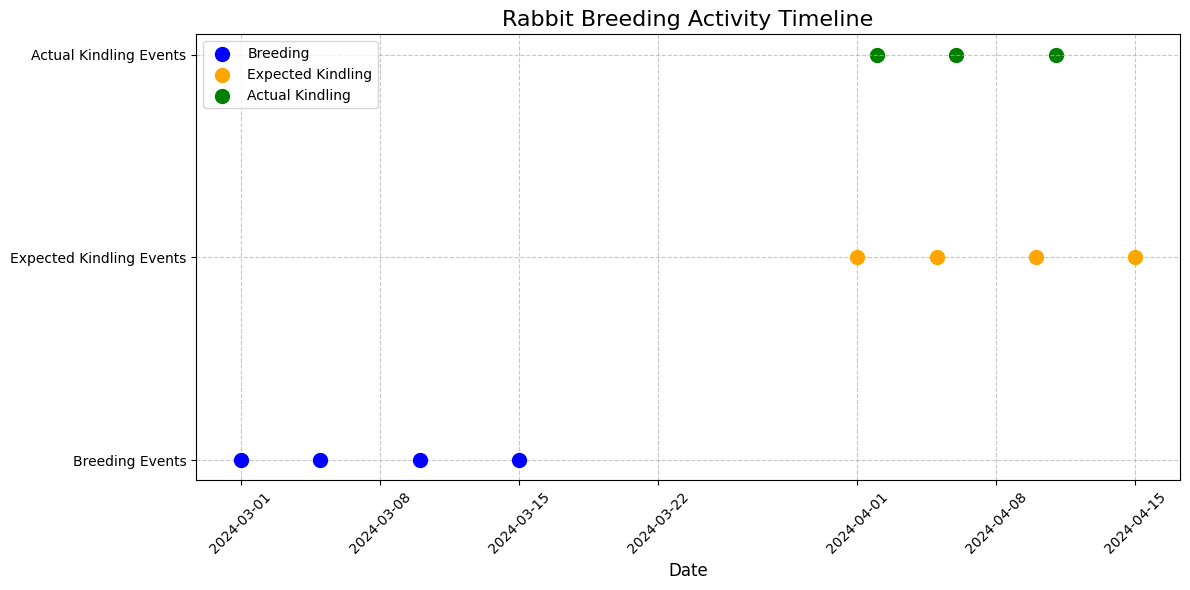

Timeline plot of breeding activity generated.


In [11]:
fig, ax = plt.subplots(figsize=(12, 6))

# Plot Breeding Dates
ax.scatter(df_breeding['Breeding Date'], [1] * len(df_breeding), color='blue', label='Breeding', s=100, zorder=3)

# Plot Expected Kindling Dates
ax.scatter(df_breeding['Expected Kindling Date'], [2] * len(df_breeding), color='orange', label='Expected Kindling', s=100, zorder=2)

# Plot Actual Kindling Dates (only non-null values)
# Filter out NaT values before plotting
df_actual_kindling = df_breeding.dropna(subset=['Actual Kindling Date'])
ax.scatter(df_actual_kindling['Actual Kindling Date'], [3] * len(df_actual_kindling), color='green', label='Actual Kindling', s=100, zorder=1)

# Add titles and labels
ax.set_title('Rabbit Breeding Activity Timeline', fontsize=16)
ax.set_xlabel('Date', fontsize=12)
ax.set_yticks([1, 2, 3])
ax.set_yticklabels(['Breeding Events', 'Expected Kindling Events', 'Actual Kindling Events'])
ax.tick_params(axis='x', rotation=45)
ax.grid(True, linestyle='--', alpha=0.7)

# Add legend
ax.legend()

# Adjust layout and display plot
plt.tight_layout()
plt.show()

print("Timeline plot of breeding activity generated.")

## Final Task

### Subtask:
Summarize the capabilities of the initial rabbit breeding assistant and discuss potential next steps or additional features.


## Summary:

### Q&A
The initial rabbit breeding assistant is capable of defining rabbit profiles, recording breeding sessions, calculating expected kindling dates, tracking litter outcomes, and visualizing breeding activity over time.

### Data Analysis Key Findings
*   **Rabbit Profile Management**: The assistant can define and store individual rabbit profiles, including their ID, name, sex, breed, and birth date. Five sample profiles were added: Buster (Male), Daisy (Female), Thumper (Male), Hazel (Female), and Clover (Female).
*   **Breeding Session Recording**: It can record breeding events, capturing the breeding date, the male and female parent IDs, and any relevant notes. This functionality includes validation to ensure both male and female rabbit IDs exist and their sex is correct, preventing invalid entries. Four valid breeding sessions were successfully recorded.
*   **Expected Kindling Date Calculation**: The system automatically calculates the expected kindling date for each breeding session by adding a standard 31-day gestation period to the breeding date. For example, a session on `2024-03-01` has an expected kindling date of `2024-04-01`.
*   **Litter Outcome Tracking**: It provides a mechanism to record the outcome of each litter, including the actual kindling date, the number of kits born alive, and mortalities. Sample outcomes show a litter with 8 kits born alive and 1 mortality, and another with 7 kits born alive and 0 mortalities.
*   **Breeding Activity Visualization**: The assistant generates a timeline scatter plot using `matplotlib` and `pandas` to visualize breeding activities. This plot displays breeding dates, expected kindling dates, and actual kindling dates, allowing for an overview of the breeding schedule.

### Insights or Next Steps
*   **Enhanced Data Persistence and Management**: Implement saving and loading functionalities (e.g., to CSV, JSON, or a simple database) to persist rabbit profiles and breeding data beyond the current session, ensuring data is not lost.
*   **Advanced Analytics and Reporting**: Develop features for calculating key performance indicators, such as breeding success rates, average litter size, or mortality rates, and generate summary reports to provide deeper insights into breeding program performance.
*   **Individual Kit Tracking and Pedigree**: Extend the system to track individual kits with their own profiles post-kindling, including their ID, sex, and lineage. This would enable generating detailed pedigree charts and managing offspring over multiple generations.
